In [14]:
! pip install lazypredict

In [15]:
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [16]:
import pandas as pd
!wget https://raw.githubusercontent.com/az09tuan/PLK1/main/combined_compounds-1000active-800%20inactive.csv
df = pd.read_csv('combined_compounds-1000active-800 inactive.csv')
df

--2024-07-02 06:48:52--  https://raw.githubusercontent.com/az09tuan/PLK1/main/combined_compounds-1000active-800%20inactive.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248845 (243K) [text/plain]
Saving to: ‘combined_compounds-1000active-800 inactive.csv’

combined_compounds- 100%[===================>] 243.01K  --.-KB/s    in 0.04s   

2024-07-02 06:48:52 (6.54 MB/s) - ‘combined_compounds-1000active-800 inactive.csv’ saved [248845/248845]



,SMILE,Source,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,COc1cc2ncn(-c3cc(OCc4ccccc4C#N)c(C(N)=O)s3)c2c...,CHEMBL,active,434.48,3.65,1.00,8.00,8.22
1,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1CC3=CC(=CC=C3)Br...,Pubchem,active,636.59,4.97,2.00,8.00,6.96
2,C1=CC=C(C(=C1)COC2=C(SC(=C2)N3C=NC4=CC=CC=C43)...,Pubchem,active,428.31,4.53,1.00,5.00,7.96
3,COc1cc(C(=O)NC2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(C(C...,CHEMBL,active,481.60,2.63,2.00,8.00,7.60
4,CCOC(=O)/C(C#N)=c1\s/c(=C/Nc2ccc(NC(=O)NCCN3CC...,CHEMBL,active,498.61,1.23,3.00,9.00,7.43
...,...,...,...,...,...,...,...,...
1785,CN1CCN(c2ccc(Nc3ncc4c(=O)n([C@@H]5C=CCC5)n(-c5...,CHEMBL,inactive,526.65,3.59,2.00,10.00,4.60
1786,COc1ccccc1-n1c(=O)c2cnc(Nc3ccc4c(c3)CN(C)CC4)n...,CHEMBL,inactive,537.62,3.93,2.00,10.00,4.60
1787,Cc1cc(Nc2ncc3c(n2)N2CCN=C2N(c2c(Cl)cccc2Cl)C3=...,CHEMBL,inactive,583.50,5.34,1.00,8.00,4.60
1788,CCCCCCCCSc1ccc(C(=O)Nc2ccc(C)cc2C(=O)O)cc1,CHEMBL,inactive,399.56,6.40,2.00,3.00,4.57


In [19]:
smiles_list = df['SMILE'].tolist()
smiles_list

['COc1cc2ncn(-c3cc(OCc4ccccc4C#N)c(C(N)=O)s3)c2cc1OC',
 'CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1CC3=CC(=CC=C3)Br)NC4=C(C=C(C=C4)C(=O)NC5CCN(CC5)C)OCC)C',
 'C1=CC=C(C(=C1)COC2=C(SC(=C2)N3C=NC4=CC=CC=C43)C(=O)N)Br',
 'COc1cc(C(=O)NC2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(C(C)C)[C@H](C)C(=O)N2C',
 'CCOC(=O)/C(C#N)=c1\\s/c(=C/Nc2ccc(NC(=O)NCCN3CCCC3)cc2)c(=O)n1CC',
 'CC[C@H](C)[C@@H](C(=O)N[C@@H](CC1=CC=C(C=C1)O)C(=O)N)NC(=O)[C@H](C)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CO)NC(=O)[C@H](CC2=CN=CN2)NC(=O)[C@H](CC(C)C)NC(=O)[C@@H]3CCCN3C(=O)[C@@H]4CCCN4C(=O)[C@H](CC(=O)O)NC(=O)[C@H](CC5=CC=CC=C5)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CCC(=O)O)NC(=O)C',
 'Cn1nc(C(N)=O)c2c1-c1nc(Nc3ccccc3OC(F)(F)F)ncc1CC2',
 'COc1cc(C(=O)NC2CCN(C)CC2)c(Cl)cc1Nc1ncc2c(n1)N(C1CCCC1)CC(F)(F)C(=O)N2C',
 'CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)N(C[C@@H](C(=O)N4C)CC=C)C5CCCC5)OC',
 'C[C@H](C1=CC=CC=C1C(F)(F)F)OC2=C(SC(=C2)N3C=NC4=C3C=C(C=C4)C5=CC=CC=C5)C(=O)N',
 'CN1CCN(CC1)C2=CC(=C(C=C2)OC)NC3=NC=C4CCC5=C(C4=N3)N(N=C5C(=O)N)C',
 'CN1CCC

In [17]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 8.5 MB/s eta 0:00:00


In [20]:
# Calculate fingerprints
fingerprints = []
for smile in smiles_list:
    mol = Chem.MolFromSmiles(smile)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=55)
    fingerprints.append(fp)

# Convert fingerprints to NumPy arrays
from rdkit import DataStructs
import numpy as np
fingerprint_arrays = []
for fp in fingerprints:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_arrays.append(arr)

X = np.asarray(fingerprint_arrays)
X

[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerator
[06:49:30] DEPRECATION WARNING: please use MorganGenerat

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [21]:
X1=X
X1

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [22]:
df['bioactivity_class'] = df['bioactivity_class'].map({'active': 1, 'inactive': 0})

In [23]:
df

,SMILE,Source,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,COc1cc2ncn(-c3cc(OCc4ccccc4C#N)c(C(N)=O)s3)c2c...,CHEMBL,1,434.48,3.65,1.00,8.00,8.22
1,CC[C@@H]1C(=O)N(C2=CN=C(N=C2N1CC3=CC(=CC=C3)Br...,Pubchem,1,636.59,4.97,2.00,8.00,6.96
2,C1=CC=C(C(=C1)COC2=C(SC(=C2)N3C=NC4=CC=CC=C43)...,Pubchem,1,428.31,4.53,1.00,5.00,7.96
3,COc1cc(C(=O)NC2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(C(C...,CHEMBL,1,481.60,2.63,2.00,8.00,7.60
4,CCOC(=O)/C(C#N)=c1\s/c(=C/Nc2ccc(NC(=O)NCCN3CC...,CHEMBL,1,498.61,1.23,3.00,9.00,7.43
...,...,...,...,...,...,...,...,...
1785,CN1CCN(c2ccc(Nc3ncc4c(=O)n([C@@H]5C=CCC5)n(-c5...,CHEMBL,0,526.65,3.59,2.00,10.00,4.60
1786,COc1ccccc1-n1c(=O)c2cnc(Nc3ccc4c(c3)CN(C)CC4)n...,CHEMBL,0,537.62,3.93,2.00,10.00,4.60
1787,Cc1cc(Nc2ncc3c(n2)N2CCN=C2N(c2c(Cl)cccc2Cl)C3=...,CHEMBL,0,583.50,5.34,1.00,8.00,4.60
1788,CCCCCCCCSc1ccc(C(=O)Nc2ccc(C)cc2C(=O)O)cc1,CHEMBL,0,399.56,6.40,2.00,3.00,4.57


In [ ]:
df.to_csv('bioactivity_class-1-0.csv')

<Axes: xlabel='bioactivity_class', ylabel='count'>

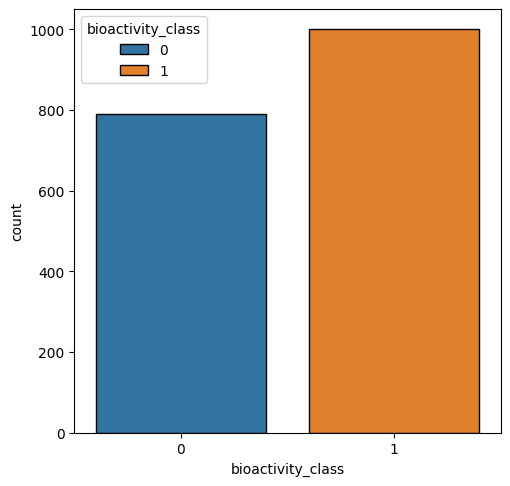

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df, edgecolor='black', hue='bioactivity_class')

In [24]:
Class= df['bioactivity_class']
Class=Class.values
Class

array([1, 1, 1, ..., 0, 0, 0])

In [25]:
Y1=Class
Y1

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
# Perform data splitting using 80/20 ratio
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=0)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X1_train, X1_test, Y1_train,Y1_test)

print(models)

100%|██████████| 29/29 [00:07<00:00,  3.84it/s]

[LightGBM] [Info] Number of positive: 801, number of negative: 631
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 156
[LightGBM] [Info] Number of data points in the train set: 1432, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.559358 -> initscore=0.238555
[LightGBM] [Info] Start training from score 0.238555
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LabelPropagation                   0.95               0.95     0.95      0.95   
LabelSpreading                     0.95               0.95     0.95      0.95   
LGBMClassifier                     0.94               0.94     0.94      0.94   
ExtraTreesClassifier               0.94      

# LabelPropagation  

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics

In [48]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import GridSearchCV


In [ ]:
P1 = LabelPropagation()
P1.fit(X1_train, Y1_train)
P1.score(X1_test,Y1_test)

0.9217877094972067

<Figure size 640x480 with 0 Axes>

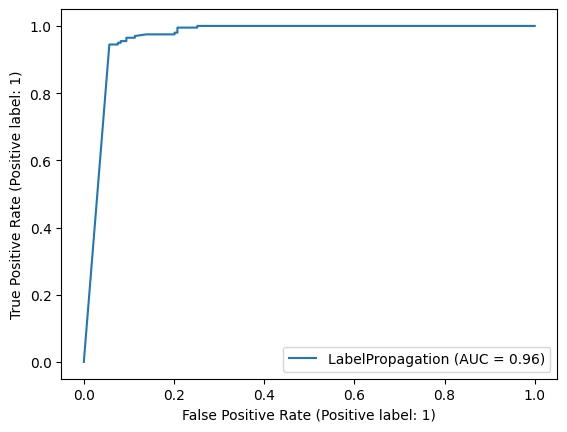

In [ ]:
# Compute the ROC curve
y_score = P1.predict_proba(X1_test)[:, 1]  # Assuming a binary classification
fpr, tpr, thresholds = roc_curve(Y1_test, y_score, pos_label='1')
roc_auc = roc_auc_score(Y1_test, y_score)
# Plot the ROC curve
plt.figure()
RocCurveDisplay.from_estimator(P1, X1_test, Y1_test)


In [ ]:
y_pred = P1.predict(X1_test)
confusion_matrix( Y1_test, y_pred)

array([[136,  23],
       [  5, 194]])

# LabelSpreading

In [ ]:
from sklearn.semi_supervised import LabelSpreading
P2 = LabelSpreading()
P2.fit(X1_train, Y1_train)
P2.score(X1_test,Y1_test)

0.9217877094972067

<Figure size 640x480 with 0 Axes>

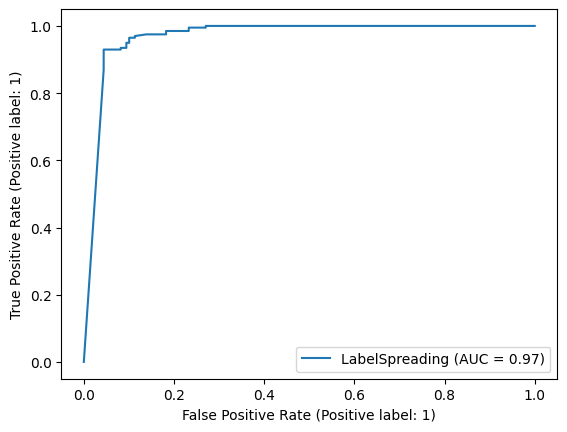

In [ ]:
# Compute the ROC curve
y_score = P2.predict_proba(X1_test)[:, 1]  # Assuming a binary classification
fpr, tpr, thresholds = roc_curve(Y1_test, y_score, pos_label='1')
roc_auc = roc_auc_score(Y1_test, y_score)
# Plot the ROC curve
plt.figure()
RocCurveDisplay.from_estimator(P2, X1_test, Y1_test)

In [ ]:
y_pred = P2.predict(X1_test)
confusion_matrix( Y1_test, y_pred)

array([[136,  23],
       [  5, 194]])

# LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier
P3 = LGBMClassifier()
P3.fit(X1_train, Y1_train)
P3.score(X1_test,Y1_test)

[LightGBM] [Info] Number of positive: 801, number of negative: 631
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 1432, number of used features: 52
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.559358 -> initscore=0.238555
[LightGBM] [Info] Start training from score 0.238555


0.9441340782122905

<Figure size 640x480 with 0 Axes>

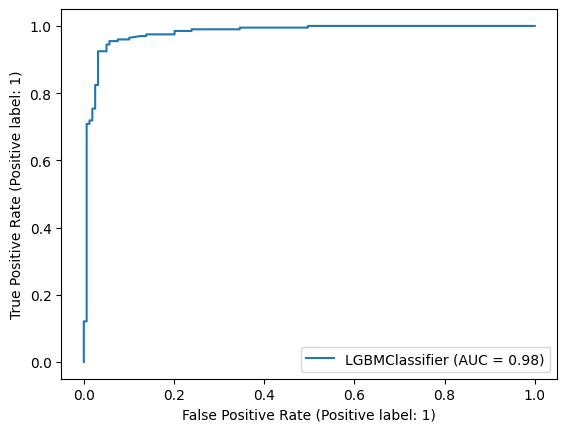

In [ ]:
# Compute the ROC curve
y_score = P3.predict_proba(X1_test)[:, 1]  # Assuming a binary classification
fpr, tpr, thresholds = roc_curve(Y1_test, y_score, pos_label='1')
roc_auc = roc_auc_score(Y1_test, y_score)
# Plot the ROC curve
plt.figure()
RocCurveDisplay.from_estimator(P3, X1_test, Y1_test)


In [ ]:
y_pred = P3.predict(X1_test)
confusion_matrix( Y1_test, y_pred)

array([[147,  12],
       [  8, 191]])

# ExtraTreesClassifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
P4 = ExtraTreesClassifier()
P4.fit(X1_train, Y1_train)
P4.score(X1_test,Y1_test)

0.9413407821229051

<Figure size 640x480 with 0 Axes>

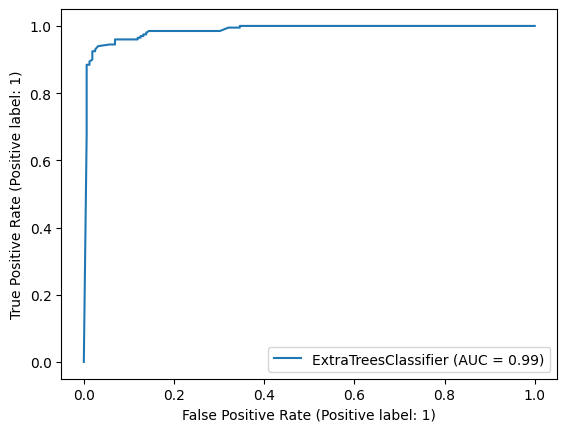

In [ ]:
# Compute the ROC curve
y_score = P4.predict_proba(X1_test)[:, 1]  # Assuming a binary classification
fpr, tpr, thresholds = roc_curve(Y1_test, y_score, pos_label='1')
roc_auc = roc_auc_score(Y1_test, y_score)
# Plot the ROC curve
plt.figure()
RocCurveDisplay.from_estimator(P4, X1_test, Y1_test)

In [ ]:
y_pred = P4.predict(X1_test)
confusion_matrix( Y1_test, y_pred)

array([[146,  13],
       [  8, 191]])

# XGBClassifier

In [ ]:
from xgboost import XGBClassifier
P5 = ExtraTreesClassifier()
P5.fit(X1_train, Y1_train)
P5.score(X1_test,Y1_test)

0.9329608938547486

<Figure size 640x480 with 0 Axes>

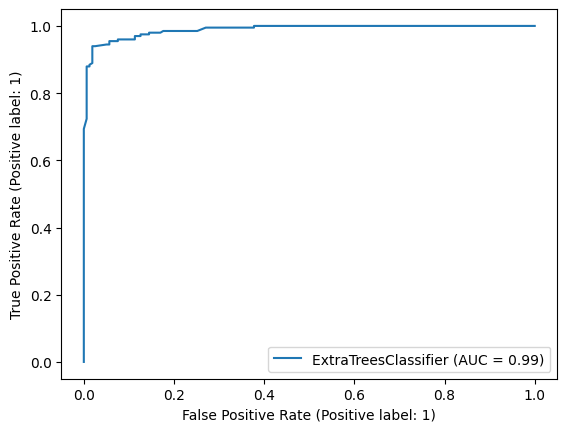

In [ ]:
# Compute the ROC curve
y_score = P5.predict_proba(X1_test)[:, 1]  # Assuming a binary classification
fpr, tpr, thresholds = roc_curve(Y1_test, y_score, pos_label='1')
roc_auc = roc_auc_score(Y1_test, y_score)
# Plot the ROC curve
plt.figure()
RocCurveDisplay.from_estimator(P5, X1_test, Y1_test)

In [ ]:
y_pred = P5.predict(X1_test)
confusion_matrix( Y1_test, y_pred)

array([[143,  16],
       [  8, 191]])

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(random_state=0).fit(X1_train, Y1_train)

In [ ]:
clf_2.score(X1_test, Y1_test)

0.9357541899441341

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

In [ ]:
# Compute the ROC curve
y_score = clf_2.predict_proba(X1_test)[:, 1]  # Assuming a binary classification
fpr, tpr, thresholds = roc_curve(Y1_test, y_score, pos_label='1')
roc_auc = roc_auc_score(Y1_test, y_score)


<Figure size 640x480 with 0 Axes>

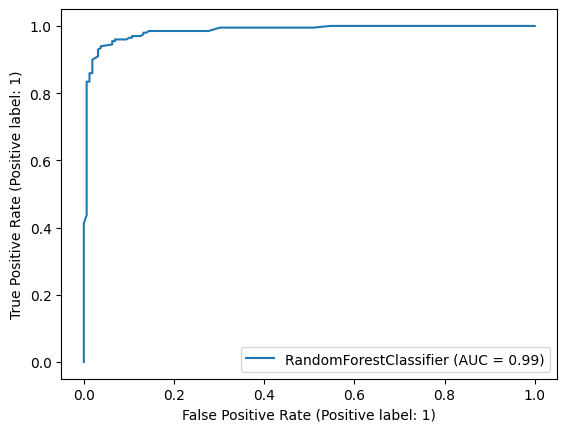

In [ ]:
# Plot the ROC curve
plt.figure()
RocCurveDisplay.from_estimator(clf_2, X1_test, Y1_test)


In [ ]:
y_pred = clf_2.predict(X1_test)
confusion_matrix( Y1_test, y_pred)

array([[143,  16],
       [  7, 192]])

# Cmap backtest

# Data handling

In [ ]:
url = "https://raw.githubusercontent.com/az09tuan/PLK1/main/positive%20Cmap-inactive-active.csv"
df_test = pd.read_csv(url)
df_test

,pert_iname,cell_iname,norm_cs,bioactivity_class,SMILE
0,CC-401,MDAMB231,2.33,active,C1CCN(CC1)CCOC2=CC=CC(=C2)C3=NNC4=C3C=C(C=C4)C...
1,amsacrine,MDAMB231,2.13,active,COC1=C(C=CC(=C1)NS(=O)(=O)C)NC2=C3C=CC=CC3=NC4...
2,aphidicolin,MDAMB231,2.12,active,C[C@]12CC[C@H]([C@@]([C@@H]1CC[C@@H]3[C@@]24CC...
3,pelitinib,MDAMB231,2.04,active,CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=CC(=C(C=C3)F)Cl)...
4,SB-239063,MDAMB231,1.91,active,COC1=NC=CC(=N1)C2=C(N=CN2C3CCC(CC3)O)C4=CC=C(C...
...,...,...,...,...,...
374,BX-912,MDAMB231,0.41,inactive,C1CCN(C1)C(=O)NC2=CC=CC(=C2)NC3=NC=C(C(=N3)NCC...
375,anecortave-acetate,MDAMB231,0.40,inactive,CC(=O)OCC(=O)[C@]1(CC[C@@H]2[C@@]1(CC=C3[C@H]2...
376,lamotrigine,MDAMB231,0.39,inactive,C1=CC(=C(C(=C1)Cl)Cl)C2=C(N=C(N=N2)N)N
377,SU-11274,MDAMB231,0.34,inactive,CC1=C(NC(=C1C(=O)N2CCN(CC2)C)C)/C=C\3/C4=C(C=C...


In [ ]:
smiles_test = df_test['SMILE'].tolist()
smiles_test

['C1CCN(CC1)CCOC2=CC=CC(=C2)C3=NNC4=C3C=C(C=C4)C5=NC=NN5',
 'COC1=C(C=CC(=C1)NS(=O)(=O)C)NC2=C3C=CC=CC3=NC4=CC=CC=C42',
 'C[C@]12CC[C@H]([C@@]([C@@H]1CC[C@@H]3[C@@]24CC[C@@]([C@H](C3)C4)(CO)O)(C)CO)O',
 'CCOC1=C(C=C2C(=C1)N=CC(=C2NC3=CC(=C(C=C3)F)Cl)C#N)NC(=O)/C=C/CN(C)C',
 'COC1=NC=CC(=N1)C2=C(N=CN2C3CCC(CC3)O)C4=CC=C(C=C4)F',
 'C1C2=CN=C(N=C2C3=C(C=C(C=C3)Cl)C(=N1)C4=C(C=CC=C4F)F)NC5=CC=C(C=C5)C(=O)O',
 'CN1C=NC2=C1C=C(C(=C2F)NC3=C(C=C(C=C3)Br)Cl)C(=O)NOCCO',
 'C1CNC(=O)C2=C1NC(=C2)C3=CC=NC=C3',
 'CCCCC(=O)OCC(=O)[C@]1(C[C@@H](C2=C(C1)C(=C3C(=C2O)C(=O)C4=C(C3=O)C=CC=C4OC)O)O[C@H]5C[C@@H]([C@@H]([C@@H](O5)C)O)NC(=O)C(F)(F)F)O',
 'COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C(=O)N)OCC4=CC=CC=C4C(F)(F)F)OC',
 'C[C@H](C1=CC=C(C=C1)C(=O)NC2=C3C=CNC3=NC=C2)N',
 'CN1C=C(C=N1)C2=C3C=NNC(=O)C4=C3C(=CC(=C4)NC(=O)[C@@H](C5CCCCC5)N)N2',
 'CC1=CC(=NN1)NC2=CC(=NC(=N2)SC3=CC=C(C=C3)NC(=O)C4CC4)N5CCN(CC5)C',
 'CC(C(=O)OC(C)(C)CC1=CC=C(C=C1)Cl)N',
 'CCOC(=O)C1=CN=C(C=C1)C#CC2=CC3=C(C=C2)SCCC3(C)C',
 'C1=C(N=C(

In [ ]:
# Calculate fingerprints
fingerprints = []
for smile in smiles_test:
    mol = Chem.MolFromSmiles(smile)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=55)
    fingerprints.append(fp)

# Convert fingerprints to NumPy arrays
from rdkit import DataStructs
import numpy as np
fingerprint_arrays = []
for fp in fingerprints:
    arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, arr)
    fingerprint_arrays.append(arr)

X_testout = np.asarray(fingerprint_arrays)
X_testout

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 0., 1., 1.]])

In [ ]:
X_testout.shape

(379, 55)

In [ ]:
class_list1 = []  # Use a more descriptive variable name
for bioactivity_class in df_test['bioactivity_class']:
    if bioactivity_class == "active":
        class_list1.append("1")
    elif bioactivity_class == "inactive": # Fixed indentation here
        class_list1.append("0")

In [ ]:
Class= df['bioactivity_class']
Class=Class.values
Class

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
import numpy as np
Y_testout=class_list1
Y_testout= pd.DataFrame({'Y_testout':class_list1})
Y_testout=Y_testout[('Y_testout')].values
Y_testout=np.array(Y_testout)
Y_testout=Y_testout.astype('int')
Y_testout


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
Y_testout.shape

(379,)

In [ ]:
y_pred = P3.predict(X_testout)

In [ ]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Results

In [ ]:
y_pred = P1.predict(X_testout)
confusion_matrix( Y_testout, y_pred)

array([[219, 129],
       [ 16,  15]])

In [ ]:
y_pred = P2.predict(X_testout)
confusion_matrix( Y_testout, y_pred)

array([[219, 129],
       [ 16,  15]])

In [ ]:
y_pred = P3.predict(X_testout)
confusion_matrix( Y_testout, y_pred)

array([[304,  44],
       [ 20,  11]])

In [ ]:
y_pred = P4.predict(X_testout)
confusion_matrix( Y_testout, y_pred)

array([[328,  20],
       [ 23,   8]])

In [ ]:
y_pred = P5.predict(X_testout)
confusion_matrix( Y_testout, y_pred)

array([[329,  19],
       [ 23,   8]])

# Because, Lazyprediction do not support for neural network. We also used convolutional neural network to train the model with 500 epochs.

# Deep learning model

# Prepare for Deep learning model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [10]:
from datetime import datetime
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation, Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, AveragePooling1D, AveragePooling2D, Input

In [11]:
input_shape = (55,1)

In [12]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import random
from pandas import DataFrame
from datetime import datetime
import keras
from keras import Sequential, Input, Model  # Import Input directly from keras
from keras.layers import Dense, Dropout, Flatten, Reshape, Activation
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, AveragePooling1D, AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)
from tensorflow.keras import backend as K
#from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU  # Import LeakyReLU from keras.layers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import tensorflow as tf



In [26]:
values = array(Y1)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[1 1 1 ... 0 0 0]
[1 1 1 ... 0 0 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[1]


In [27]:
onehot_encoded.shape

(1790, 2)

In [28]:
onehot_encoded = np.array(onehot_encoded, dtype=float)

In [29]:
X1 = np.array(X1, dtype=float)
X1

array([[1., 0., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [30]:
Y = onehot_encoded
print(Y)
print(Y.shape)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(1790, 2)



# Deep learning model

In [36]:
X1_train, X1_test, Y_train, Y_test = train_test_split(
X1, Y, test_size=0.2, random_state=0)

In [37]:
num_classes = 2
learning_rate = 0.0001
training_epochs = 500
batch_size = 25

In [38]:
X1_train_X = np.expand_dims(X1_train, axis=2)
X1_test_X = np.expand_dims(X1_test, axis=2)

In [ ]:
model = Sequential()

## for yoon # Input size should be [batch, 1d, 2d, ch] = (None, 1, 15000, 1)
#model.add(Conv1D (kernel_size = 11, filters = 16, input_shape=(train_X.shape[1],train_X.shape[2]), padding='same'))
model.add(Conv1D (kernel_size = 11, filters = 16, input_shape=input_shape, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D (kernel_size = 11, filters = 16, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(Conv1D (kernel_size = 11, filters = 32, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D (kernel_size = 11, filters = 32, padding='same'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv1D (kernel_size = 11, filters = 64, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))
model.add(Conv1D (kernel_size = 11, filters = 64, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2, strides = 2, padding='same'))

model.add(Flatten())

model.add(Dense (1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (2048))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (4096))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (2048))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense (1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation = 'softmax',activity_regularizer=keras.regularizers.l2()  ))
model.compile( loss='categorical_crossentropy', optimizer= tf.optimizers.Adam(), metrics=['accuracy'])
#model.compile( loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])


In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
from keras.callbacks import ModelCheckpoint
# Set callback functions to early stop training and save the best model so far
checkpoint = [ModelCheckpoint(filepath="models.hdf5")]

In [ ]:
# Now fit the model
model_train = model.fit(X1_train_X, Y_train, batch_size=batch_size,
                        epochs=training_epochs, verbose=1,
                        callbacks=[cp_callback],
                        validation_data=(X1_test_X, Y_test))

Epoch 1/500
58/58 [==============================] - ETA: 0s - loss: 0.9107 - accuracy: 0.7472
Epoch 1: saving model to training_1/cp.ckpt
58/58 [==============================] - 38s 449ms/step - loss: 0.9107 - accuracy: 0.7472 - val_loss: 0.7306 - val_accuracy: 0.5559
Epoch 2/500
58/58 [==============================] - ETA: 0s - loss: 0.3107 - accuracy: 0.8813
Epoch 2: saving model to training_1/cp.ckpt
58/58 [==============================] - 23s 402ms/step - loss: 0.3107 - accuracy: 0.8813 - val_loss: 2.5484 - val_accuracy: 0.5559
Epoch 3/500
58/58 [==============================] - ETA: 0s - loss: 0.1637 - accuracy: 0.9462
Epoch 3: saving model to training_1/cp.ckpt
58/58 [==============================] - 23s 389ms/step - loss: 0.1637 - accuracy: 0.9462 - val_loss: 1.6622 - val_accuracy: 0.5559
Epoch 4/500
58/58 [==============================] - ETA: 0s - loss: 0.1275 - accuracy: 0.9588
Epoch 4: saving model to training_1/cp.ckpt
58/58 [==============================] - 27s 463

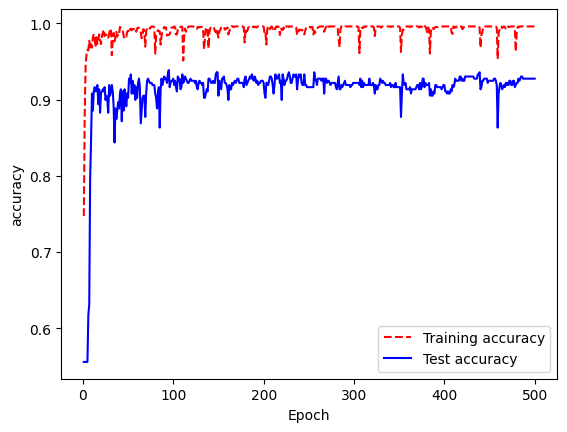

In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library and give it the alias 'plt'

# Get training and test loss histories
training_loss = model_train.history["accuracy"]
test_loss = model_train.history["val_accuracy"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training accuracy", "Test accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.show();

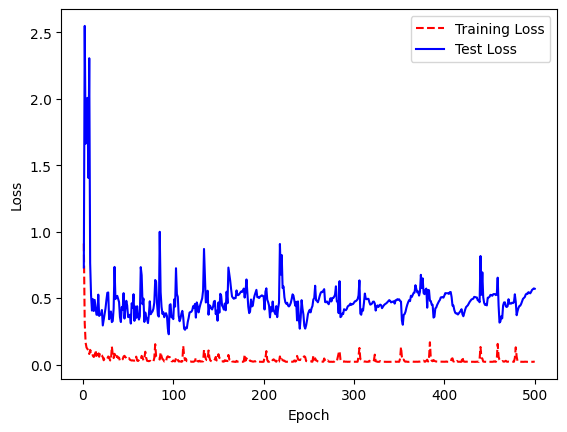

In [ ]:
# Get training and test loss histories
training_loss = model_train.history["loss"]
test_loss = model_train.history["val_loss"]
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)
# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

# Save the model

In [ ]:
# Save the entire model after training
model.save('my_model.h5')

In [7]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('my_model.h5')


In [43]:
y_pred = model.predict(X1_test)

12/12 [==============================] - 1s 98ms/step


In [45]:
y_pred = np.round(y_pred,0)

print(y_pred)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 

In [42]:
Y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [52]:
Y_test_matrix = np.argmax(Y_test, axis=1)
y_pred_mextrix= np.argmax(y_pred, axis=1)

In [53]:
confusion_matrix( Y_test_matrix, y_pred_mextrix)

array([[140,  19],
       [  7, 192]])